In [52]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [53]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [54]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2050:
        demand.append(400_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [55]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [56]:
Terminal_calcs=[]
stack_cranes = ['rmg', 'rtg', 'sc', 'rs']
fuel_costs = [0.1, 0.5, 1, 2]
# Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']
for crane in stack_cranes:   
    Terminal_dummy = container_system.System(startyear = startyear, 
                                             lifecycle = lifecycle, 
                                             elements = demand + vessels, 
                                             operational_hours = 7665,   # example Wijnand
                                             debug=False,
                                             stack_equipment = crane,
                                             laden_stack = crane) 
    NPV=Terminal_dummy.simulate()
    Terminal_calcs.append(NPV)
print(Terminal_calcs)


[321379857.09119713, 343980697.6855616, 323766915.0496325, 324336952.8287773]


In [57]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

In [58]:
Terminal_calcs=[]
stack_cranes = ['rmg', 'rtg', 'sc', 'rs']
fuel_costs = [0.1, 0.5, 1, 2]
# Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']

for crane in stack_cranes:
    for i in fuel_costs: 
        Terminal_dummy = container_system.System(startyear = startyear, 
                                                 lifecycle = lifecycle, 
                                                 elements = demand + vessels, 
                                                 operational_hours = 7665,   # example Wijnand
                                                 debug=False,
                                                 stack_equipment = crane,
                                                 laden_stack = crane,
                                                 fuel_price = i ) 
        NPV=Terminal_dummy.simulate()
        Terminal_calcs.append(NPV)
print(Terminal_calcs)


[326783998.5816337, 324382157.9192174, 321379857.09119713, 315375255.43515664, 355034253.534881, 350121562.0462946, 343980697.6855616, 331698968.9640957, 323862526.4985646, 323820032.5212615, 323766915.0496325, 323660680.1063747, 335023663.5898575, 330274014.3627107, 324336952.8287773, 312462829.7609104]


[326783998.5816337, 324382157.9192174, 321379857.09119713, 315375255.43515664]


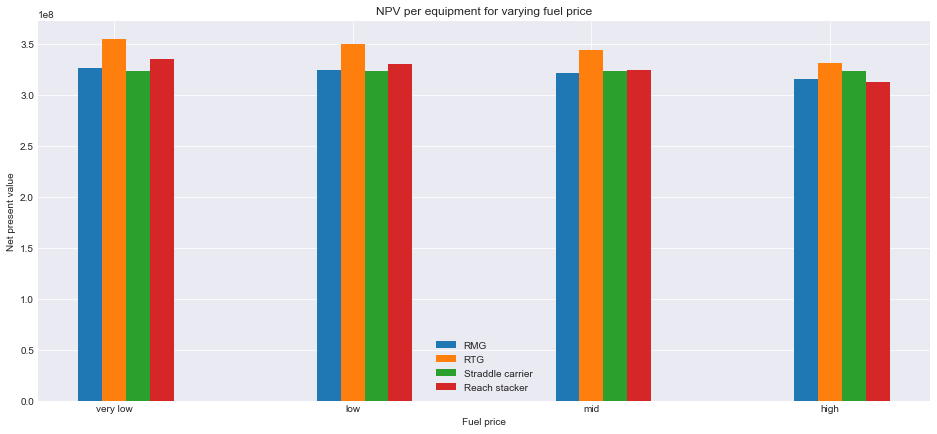

<Figure size 432x288 with 0 Axes>

In [77]:
out=chunkIt(Terminal_calcs, len(fuel_costs))

rmg=out[0]
rtg=out[1]
sc=out[2]
rs=out[3]
print(rmg)

ind = np.arange(4)  # the x locations for the groups
width = 0.1       # the width of the bars

# fig = plt.figure()
# ax = fig.add_subplot(111)
# rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

# womenMeans = (25, 32, 34, 20, 25)
# womenStd =   (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)
# ['very low', 'low', 'mid', 'high']


fig, ax = plt.subplots(figsize=(16, 7))
ax.bar(ind, rmg, width = width, label ="RMG")
ax.bar(ind+width, rtg, width = width, label="RTG")
ax.bar(ind+2*width, sc, width = width, label="Straddle carrier")
ax.bar(ind+3*width, rs, width = width, label="Reach stacker")
ax.set_xticks(ind+3*width/3)
ax.set_xticklabels(('very low', 'low', 'mid', 'high'))
plt.ylabel('Net present value')
plt.xlabel('Fuel price')
plt.legend()
ax.set_title('NPV per equipment for varying fuel price')
plt.show()
plt.savefig('C:/Users/908538/Google Drive/Afstuderen/02. Model/Masterfile/Plots/fuel.png', dpi=400)


In [60]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7350,  
                         debug=False,
                         crane_type_defaults=container_defaults.sts_crane_data) 


# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [61]:
Terminal.simulate()

312357250.6856476

## Report all elements

In [62]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

In [63]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

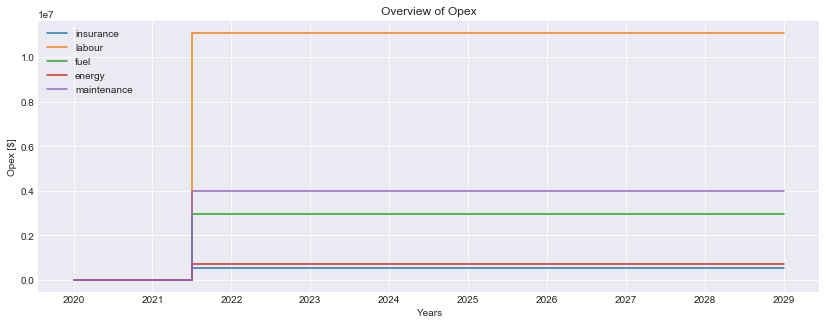

In [64]:
Terminal.opex_plot(cash_flows)

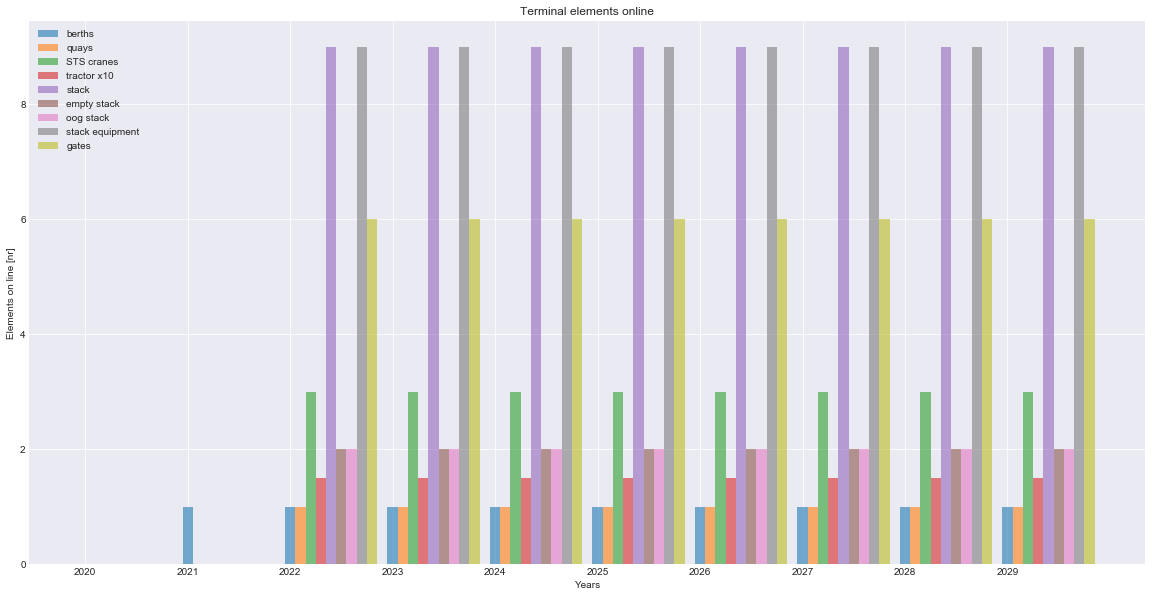

In [65]:
Terminal.terminal_elements_plot()

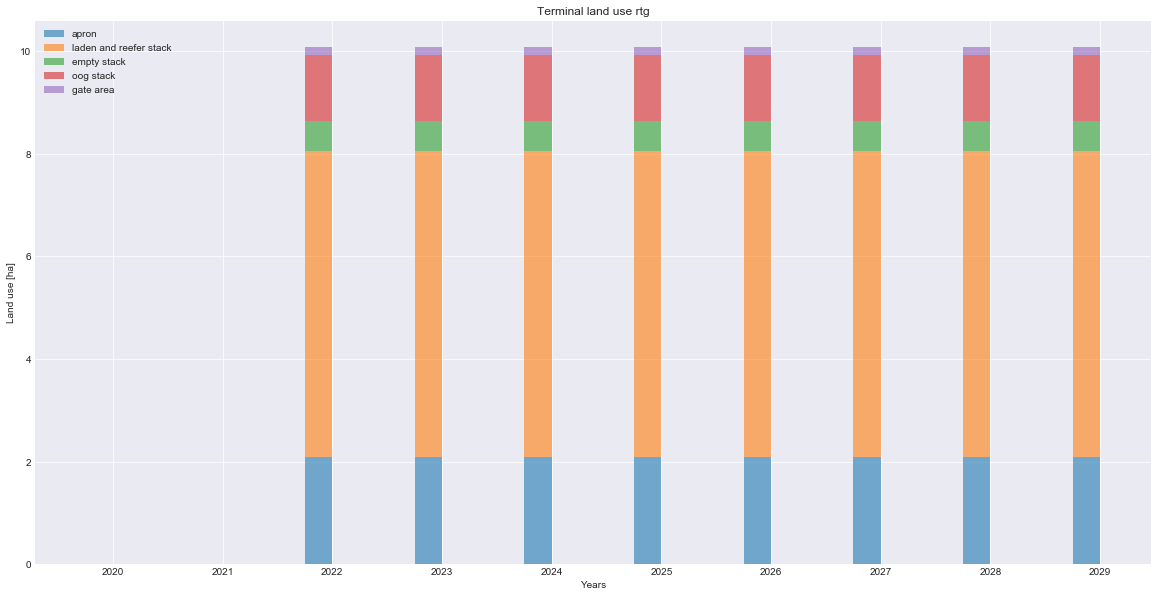

In [66]:
Terminal.land_use_plot()

In [67]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

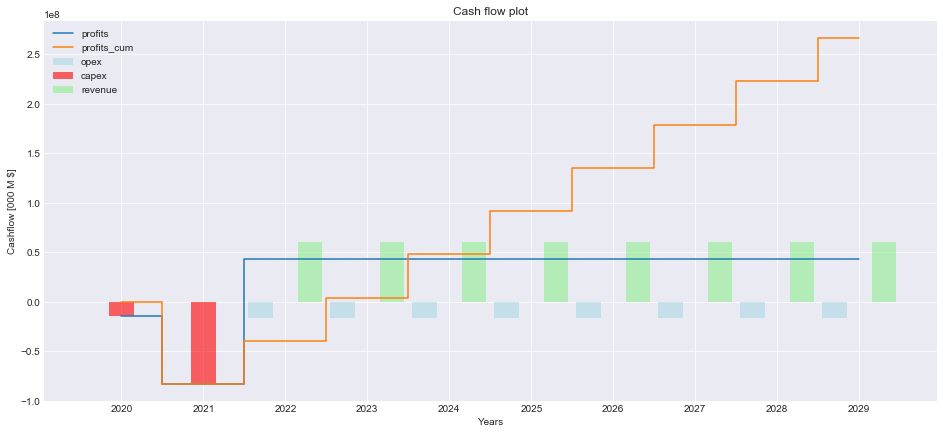

In [68]:
Terminal.cashflow_plot(cash_flows)

## SandBox

In [69]:
Terminal.NPV()

312357250.6856476